In [10]:
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np
import glob

In [14]:
def plot_image(image,title="Image"):
    plt.imshow(image)
    plt.title(title)
    plt.show()

In [ ]:
images = [cv.imread(file) for file in glob.glob("TestImages/*.ppm")]    

# Ranging Operation in RGB space

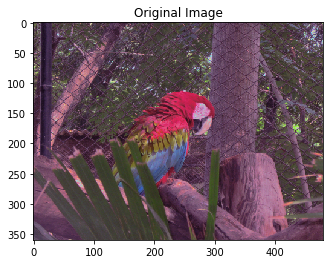

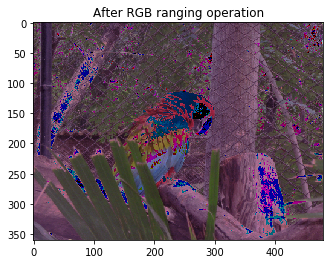

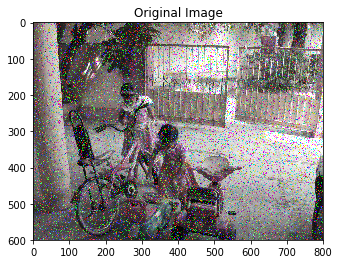

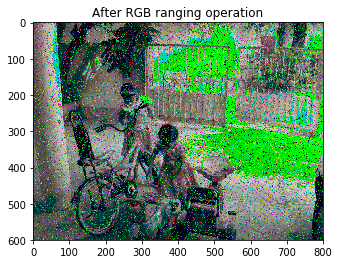

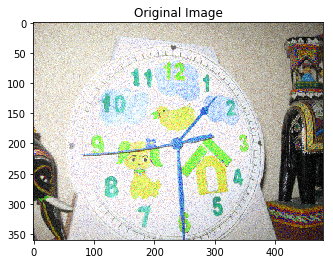

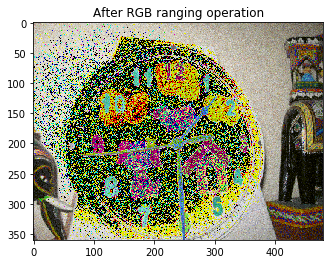

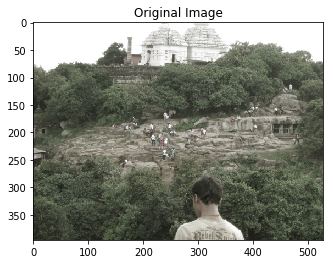

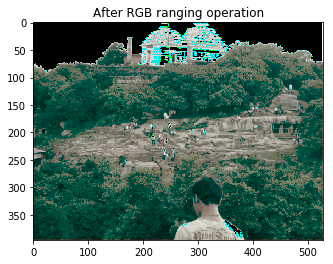

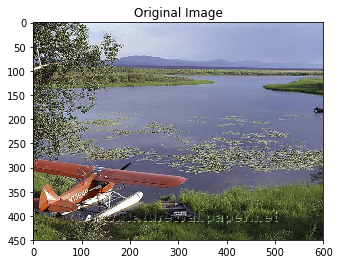

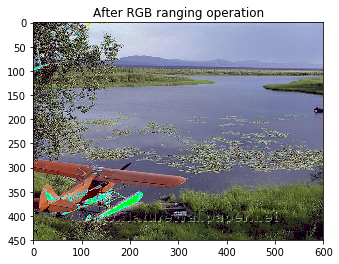

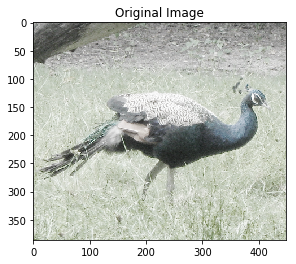

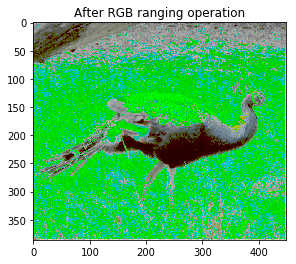

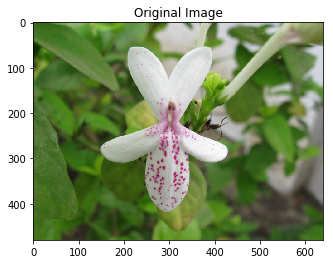

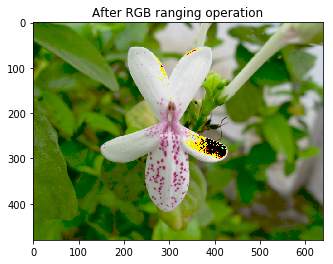

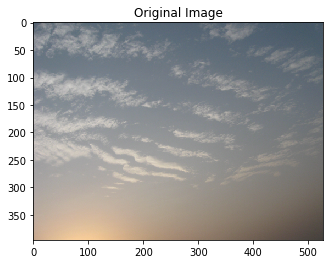

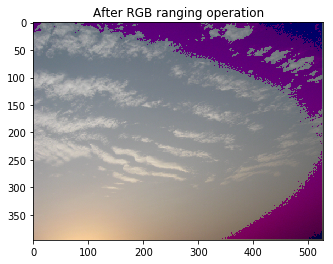

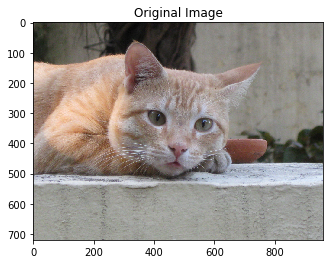

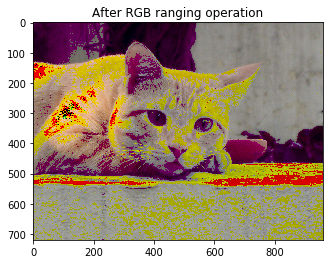

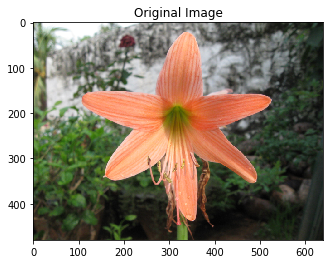

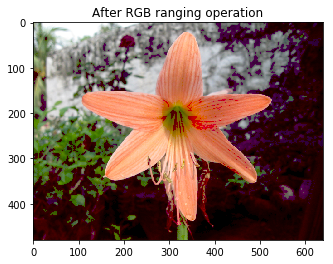

In [13]:
def check_range(value):
    if value > 255:
        return 255
    if value < 0:
        return 0
    return value

def rgb_range(image, height, width):
    r_c = np.random.randint(50,200)
    r_bw = np.random.randint(50,150)
    g_c = np.random.randint(50,200)
    g_bw = np.random.randint(50,150)
    b_c = np.random.randint(50,200)
    b_bw = np.random.randint(50,150)
    
    r_hval = check_range(r_c + r_bw) 
    r_lval = check_range(r_c - r_bw)
    g_hval = check_range(g_c + g_bw)
    g_lval = check_range(g_c - g_bw)
    b_hval = check_range(b_c + b_bw)
    b_lval= check_range(b_c - b_bw)
    
    for i in range(height-1):
        for j in range(width-1):
            image[i,j,0] = image[i,j,0] if r_lval <= image[i,j,0] <= r_hval else 0
            image[i,j,1] = image[i,j,1] if g_lval <= image[i,j,1] <= g_hval else 0
            image[i,j,2] = image[i,j,2] if b_lval <= image[i,j,2] <= b_hval else 0
    return image


for image in images:
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    height = image.shape[0]
    width = image.shape[1]
    plot_image(image, "Original Image")
    plot_image( rgb_range(image, height, width), "After RGB ranging operation" )

# Color Ranging operation in HSV space

In [15]:
def get_range_h(h_c, h_w):
    return (( h_c + h_w ) % 180 ) , (( h_c - h_w ) % 180 ) 
    
def hsv_ranging(image, height, width):
    h_c = 
    h_bw = 
    s_c = 
    v_c = 
    
for image in images:
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    image_hsv =  cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    height = image_hsv.shape[0]
    width = image_hsv.shape[1]
    new_image_hsv = hsv_ranging(image_hsv, height, width)
    new_image_rgb = cv2.cvtColor(new_image_hsv, cv2.COLOR_HSV2RGB) 
    plot_image( image, "Original Image" )
    plot_image( new_image_rgb, "After HSV ranging operation" )

IndentationError: expected an indented block (<ipython-input-15-d4ea9f757599>, line 2)

In [56]:
def euclidean_disjtance(x, y):
    return np.linalg.norm(x-y)

In [3]:
def get_8neighbors(image,x, y):
    x_window = [-1,0,1]
    y_window = [-1,0,1]
    n = []
    for i in x_window:
        for j in y_window:
            n.append(image[x+i,y+j,:])
    return n

In [115]:
def vector_median(image, height, width):
    '''
    take 3x3 window
    for each pixel as origin of window, take mean of 9 pixels(pixel and its 8 neighbours)
    find Euclidean distance of each pixel in window from mean
    replace pixel vector with vec closest to mean(shortest distance)
    
    '''  
    new_image = image.copy()
    index = {'0':[-1,-1], '1':[-1,0], '2':[-1,+1], '3':[0,-1], '4':[0,0], '5':[0,+1], '6':[+1,-1], '7':[+1,0], '8':[+1,+1]}
    for i in range(height-1):
        for j in range(width-1):
            distances = []
            neighbors = get_8neighbors(image,i,j)
            mean_vec = np.mean(neighbors, axis=0)
            for pixel in neighbors:
                distances.append(euclidean_distance(mean_vec, pixel))
            new_pixel_index = distances.index(min(distances))
            new_pixel = index[str(new_pixel_index)]
            new_image[i,j,:] = image[i+new_pixel[0], j+new_pixel[1], :]
    plot_image(new_image,"Vecctor Median Filtered Image")  

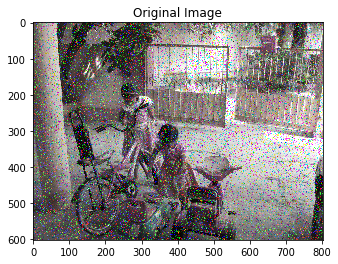

NameError: name 'vector_median' is not defined

In [4]:
# vector_median(padded_image)
#Vector Median Filter
image = cv.imread('TestImages/children-faded.ppm')
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

padded_image = cv.copyMakeBorder(image, 1, 1, 1, 1, cv.BORDER_CONSTANT)

height = padded_image.shape[0]
width = padded_image.shape[1]

plot_image(padded_image, "Original Image")
vector_median(padded_image, height, width)

In [5]:
def vector_median_grayscale_version(image, height, width):
    '''
    for each channel, 
        find median of 9 values, replace pixel with median
    '''
    new_image = image.copy()
    index = {'0':[-1,-1], '1':[-1,0], '2':[-1,+1], '3':[0,-1], '4':[0,0], '5':[0,+1], '6':[+1,-1], '7':[+1,0], '8':[+1,+1]}
    for i in range(height-1):
        for j in range(width-1):
            neighbors = get_8neighbors(image,i,j)
            median_vec = np.median(neighbors, axis=0)
#             print(median_vec)
            new_image[i,j,0] = median_vec[0]
            new_image[i,j,1] = median_vec[1]
            new_image[i,j,2] = median_vec[2]
#     plot_image(new_image,"Grayscale Vector Median Filtered Image") 
    return new_image

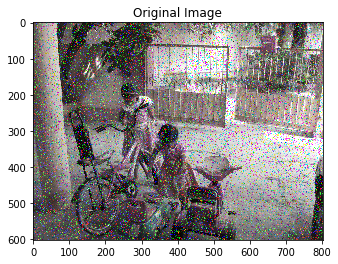

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ..., 
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [ 95,  78,  78],
        ..., 
        [ 78,  78,  63],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [ 95,  77,  73],
        [101,  80,  78],
        ..., 
        [ 98,  90,  76],
        [ 78,  78,  63],
        [  0,   0,   0]],

       ..., 
       [[  0,   0,   0],
        [ 76,  74,  73],
        [ 77,  75,  75],
        ..., 
        [ 31,  31,  29],
        [ 30,  28,  27],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [ 76,  74,  74],
        ..., 
        [ 30,  28,  27],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ..., 
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,

In [6]:
image = cv.imread('TestImages/children-faded.ppm')
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

padded_image = cv.copyMakeBorder(image, 1, 1, 1, 1, cv.BORDER_CONSTANT)

height = padded_image.shape[0]
width = padded_image.shape[1]

plot_image(padded_image, "Original Image")
vector_median_grayscale_version(padded_image, height, width)

# Vector Edge Detector

In [126]:
def fun(image, detector1, detector2, height, width):
    image = vector_median_grayscale_version(image, height, width)
    new_image = image.copy()
    for i in range(1,height-3):
            for j in range(1,width-3):
                neighbors = get_8neighbors(image,i,j)
                
                red_values = np.array([ pixel_value[0] for pixel_value in neighbors])
                red_values = red_values.reshape((3,3))
                
                green_values = np.array([ pixel_value[1] for pixel_value in neighbors])
                green_values = green_values.reshape((3,3))

                blue_values = np.array([ pixel_value[2] for pixel_value in neighbors])
                blue_values = blue_values.reshape((3,3))

                sum1_h = np.multiply(red_values,detector1).sum()
                sum1_v = np.multiply(red_values,detector2).sum()
                value = np.sqrt( np.square(sum1_h) + np.square(sum1_v) )
                new_image[i,j,0] = value if 0 <= value <= 255 else 255 if value>255 else 0
                
                sum2_h = np.multiply(green_values,detector1).sum()
                sum2_v = np.multiply(green_values,detector2).sum()
                value = x
                new_image[i,j,1] = value if 0 <= value <= 255 else 255 if value>255 else 0
                
                sum3_h = np.multiply(blue_values,detector1).sum()
                sum3_v = np.multiply(blue_values,detector2).sum()
                value = np.sqrt( np.square(sum3_h) + np.square(sum3_v) )
                new_image[i,j,2] = value if 0 <= value <= 255 else 255 if value>255 else 0
                
    return new_image

In [127]:
horizontal_filter = np.array([
            [-1,-2,-1],
            [0,0,0],
            [+1,+2,+1]
        ])
vertical_filter = np.array([
            [-1,0,1],
            [-2,0,2],
            [-1,0,1]
        ])


In [122]:
#Sobel's vector edge detector - Grayscale version
'''
for each channel, convolve with filter to detect horizontal and vertical edges
replace each pixel with new pixel in each channel
'''
def grayscale_sobel_filter(image, height, width):    
    plot_image(fun(image,horizontal_filter, vertical_filter, height, width), "Grayscale version Vector Edges")
    
#     plot_image(new_image,"Grayscale version Horizontal Vector Edges")  

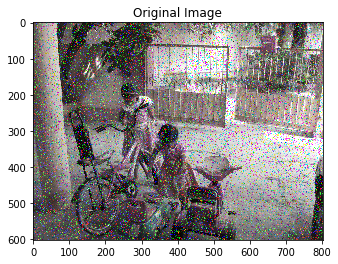

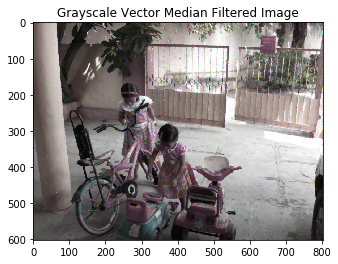

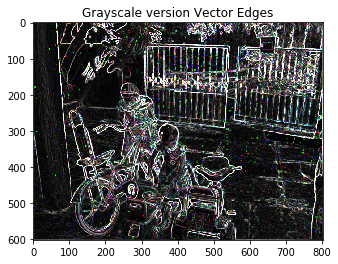

In [124]:
image = cv.imread('TestImages/children-faded.ppm')
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

padded_image = cv.copyMakeBorder(image, 1, 1, 1, 1, cv.BORDER_CONSTANT)

height = padded_image.shape[0]
width = padded_image.shape[1]

plot_image(padded_image, "Original Image")
grayscale_sobel_filter(padded_image, height, width)

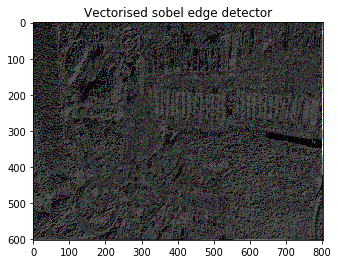

In [7]:
'''
vectorised version of Sobel edge detector

replace each pixel vector with convoluted vector
'''

def vector_sobel_filter(image):
    image = vector_median_grayscale_version(image, height, width)
    new_image = image.copy()
    for i in range(1,height-3):
            for j in range(1,width-3):
                neighbors = get_8neighbors(image,i,j)
                new_pixel_x = (1/4) * ( - (image[i-1,j-1,:] + 2*image[i,j-1,:] + image[i+1,j-1,:])\
                                        + (image[i-1,j+1,:] + 2*image[i,j+1,:] + image[i+1,j+1,:]) 
                                      )
                new_pixel_y = (1/4) * ( - (image[i-1,j-1,:] + 2*image[i-1,j,:] + image[i-1,j+1,:])\
                                        + (image[i+1,j-1,:] + 2*image[i+1,j,:] + image[i+1,j+1,:])
                                      )
                new_pixel = np.sqrt( np.square(new_pixel_x) + np.square(new_pixel_y) )
#                 print(new_pixel)
                new_image[i,j,0] = new_pixel[0] if 0 <= new_pixel[0] <= 255 else 255 if new_pixel[0] >255 else 0
                new_image[i,j,1] = new_pixel[1] if 0 <= new_pixel[1] <= 255 else 255 if new_pixel[1] >255 else 0
                new_image[i,j,2] = new_pixel[2] if 0 <= new_pixel[2] <= 255 else 255 if new_pixel[2] >255 else 0
                
    plot_image(new_image, "Vectorised sobel edge detector")
vector_sobel_filter(padded_image)